# Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Training Data

In [2]:
df_train = pd.read_csv("../files/data/TWIN/CORNER_CRACK_STRAIGHT_HOLE/TWIN_CORNER_CRACK_BH_THROUGH_THICKNESS_TRAIN.csv")
df_train

,c_index,W/R,a1/c1,a1/t,a2/c2,a2/t,r/t,b/t,phi_1,phi_2,K1-T,K2-T,K1-B,K2-B,K1-P,K2-P
0,23401.0,500.0,0.1,1.05,0.1,1.05,0.2,1.0,0.053182,0.053182,17.145531,17.145531,9.837806,9.837806,12.482485,12.482485
1,23401.0,500.0,0.1,1.05,0.1,1.05,0.2,1.0,0.062274,0.062274,17.296601,17.296601,9.886448,9.886448,12.586653,12.586653
2,23401.0,500.0,0.1,1.05,0.1,1.05,0.2,1.0,0.071365,0.071365,17.503816,17.503816,9.958380,9.958380,12.722460,12.722460
3,23401.0,500.0,0.1,1.05,0.1,1.05,0.2,1.0,0.080456,0.080456,17.733414,17.733414,10.046258,10.046258,12.879027,12.879027
4,23401.0,500.0,0.1,1.05,0.1,1.05,0.2,1.0,0.089547,0.089547,17.982605,17.982605,10.143099,10.143099,13.057435,13.057435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290171,37441.0,100.0,10.0,5.00,10.0,5.00,1.0,1.0,0.160344,0.160344,7.649924,7.649924,-2.838030,-2.838030,155.248035,155.248035
290172,37441.0,100.0,10.0,5.00,10.0,5.00,1.0,1.0,0.161346,0.161346,7.646744,7.646744,-2.885860,-2.885860,155.128642,155.128642
290173,37441.0,100.0,10.0,5.00,10.0,5.00,1.0,1.0,0.162349,0.162349,7.643530,7.643530,-2.933640,-2.933640,155.002604,155.002604
290174,37441.0,100.0,10.0,5.00,10.0,5.00,1.0,1.0,0.163352,0.163352,7.640238,7.640238,-2.981416,-2.981416,154.867807,154.867807


In [3]:
# Get unique combinations of the first four columns
CC_combinations = df_train.iloc[:, 1:8].drop_duplicates().to_numpy()

print(len(CC_combinations))

2267


In [4]:
print("Different W/r values: ", np.unique(CC_combinations[:,0], axis=0))
print("Different a1/c1 values: ", np.unique(CC_combinations[:,1], axis=0))
print("Different a1/t values: ", np.unique(CC_combinations[:,2], axis=0))
print("Different a2/c2 values: ", np.unique(CC_combinations[:,3], axis=0))
print("Different a2/t values: ", np.unique(CC_combinations[:,4], axis=0))
print("Different r/t values: ", np.unique(CC_combinations[:,5], axis=0))
print("Different b/t values: ", np.unique(CC_combinations[:,6], axis=0))

Different W/r values:  [ 33.333  50.    100.    200.    500.   ]
Different a1/c1 values:  [ 0.1     0.125   0.1667  0.25    0.5     0.75    1.      2.      4.
  6.      8.     10.    ]
Different a1/t values:  [1.05 1.5  2.   3.   4.   5.  ]
Different a2/c2 values:  [ 0.1     0.125   0.1667  0.25    0.5     0.75    1.      2.      4.
  6.      8.     10.    ]
Different a2/t values:  [1.05 1.5  2.   3.   4.   5.  ]
Different r/t values:  [0.2 0.5 1.  2.  3. ]
Different b/t values:  [1.]


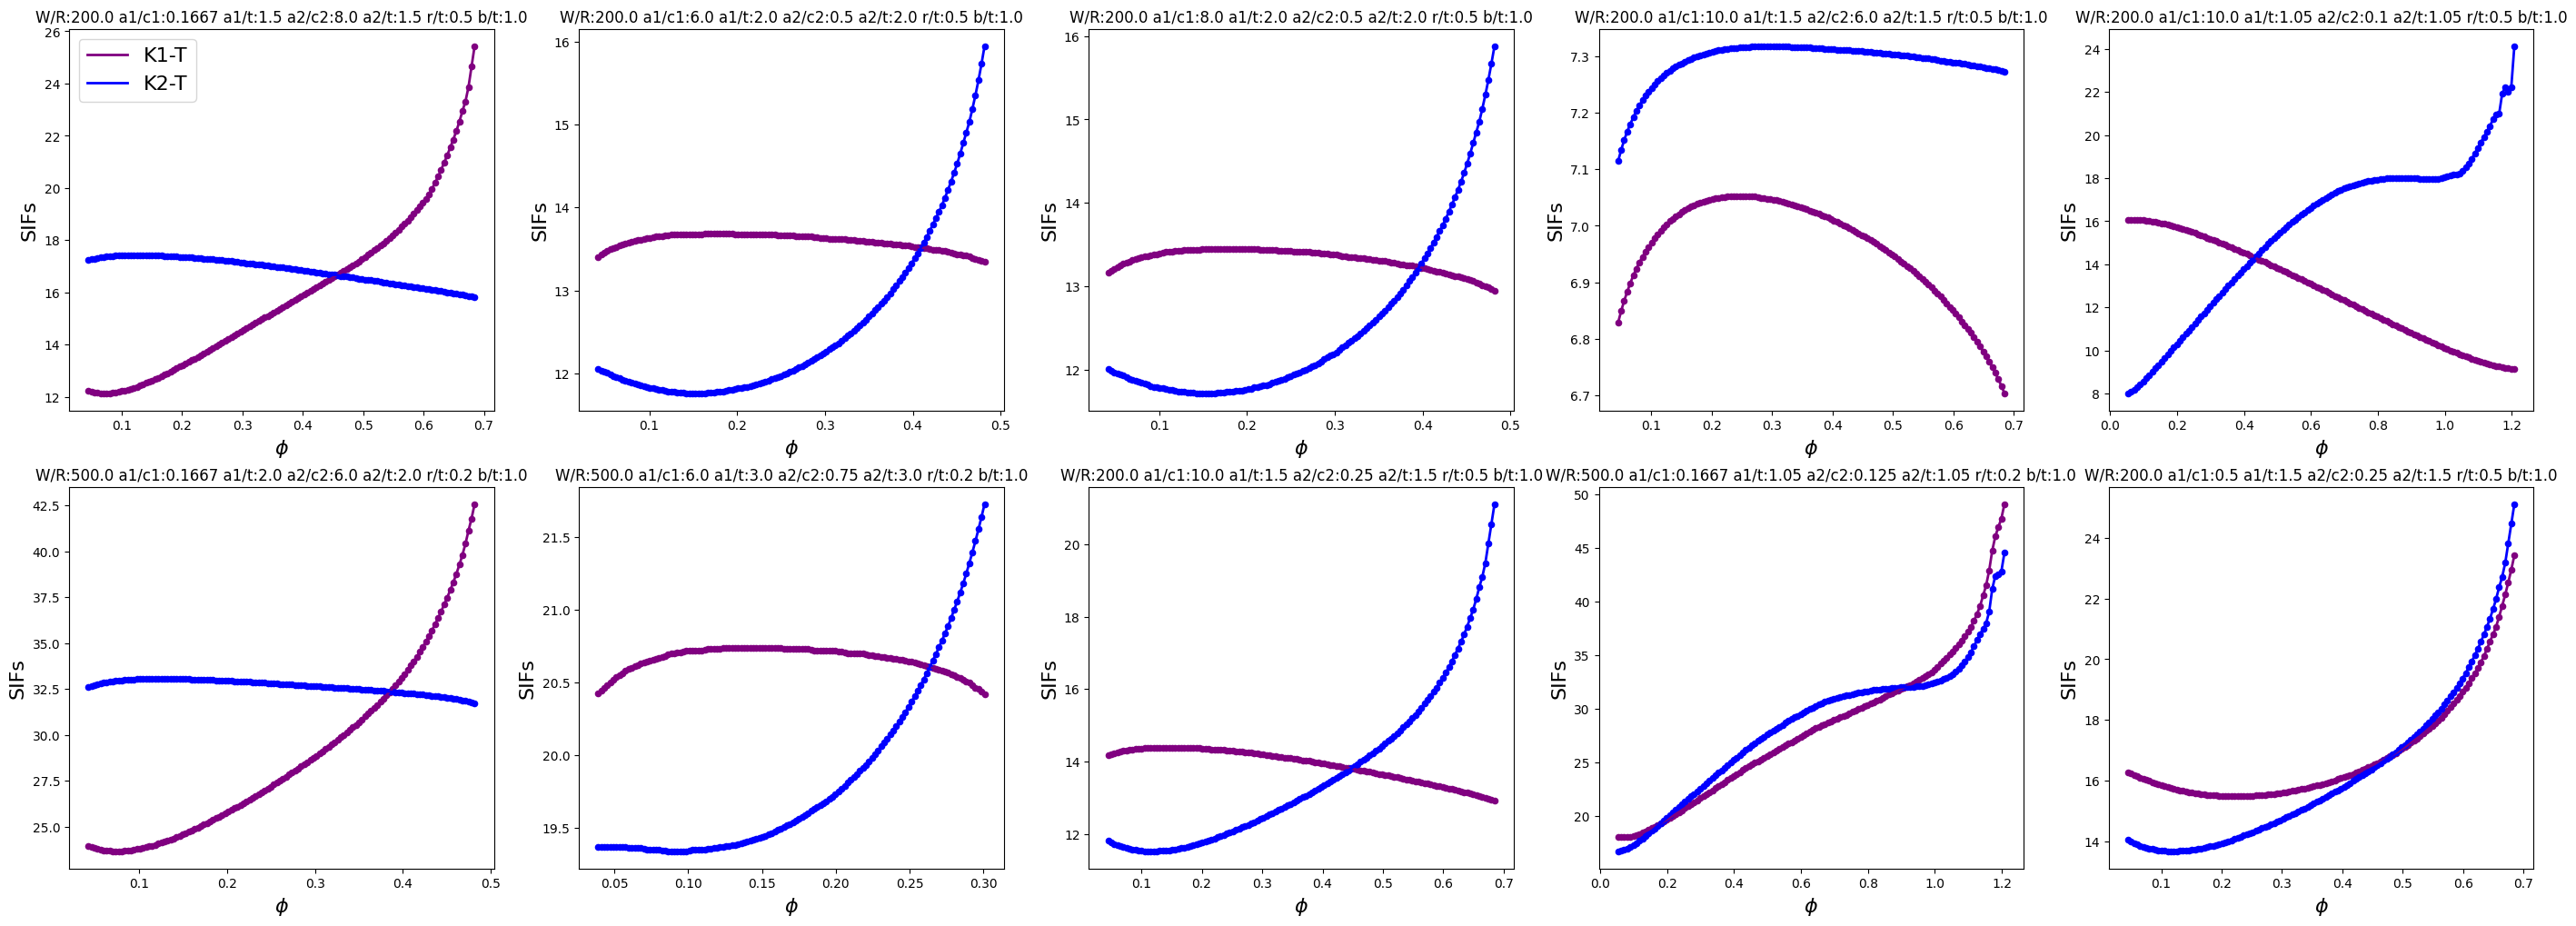

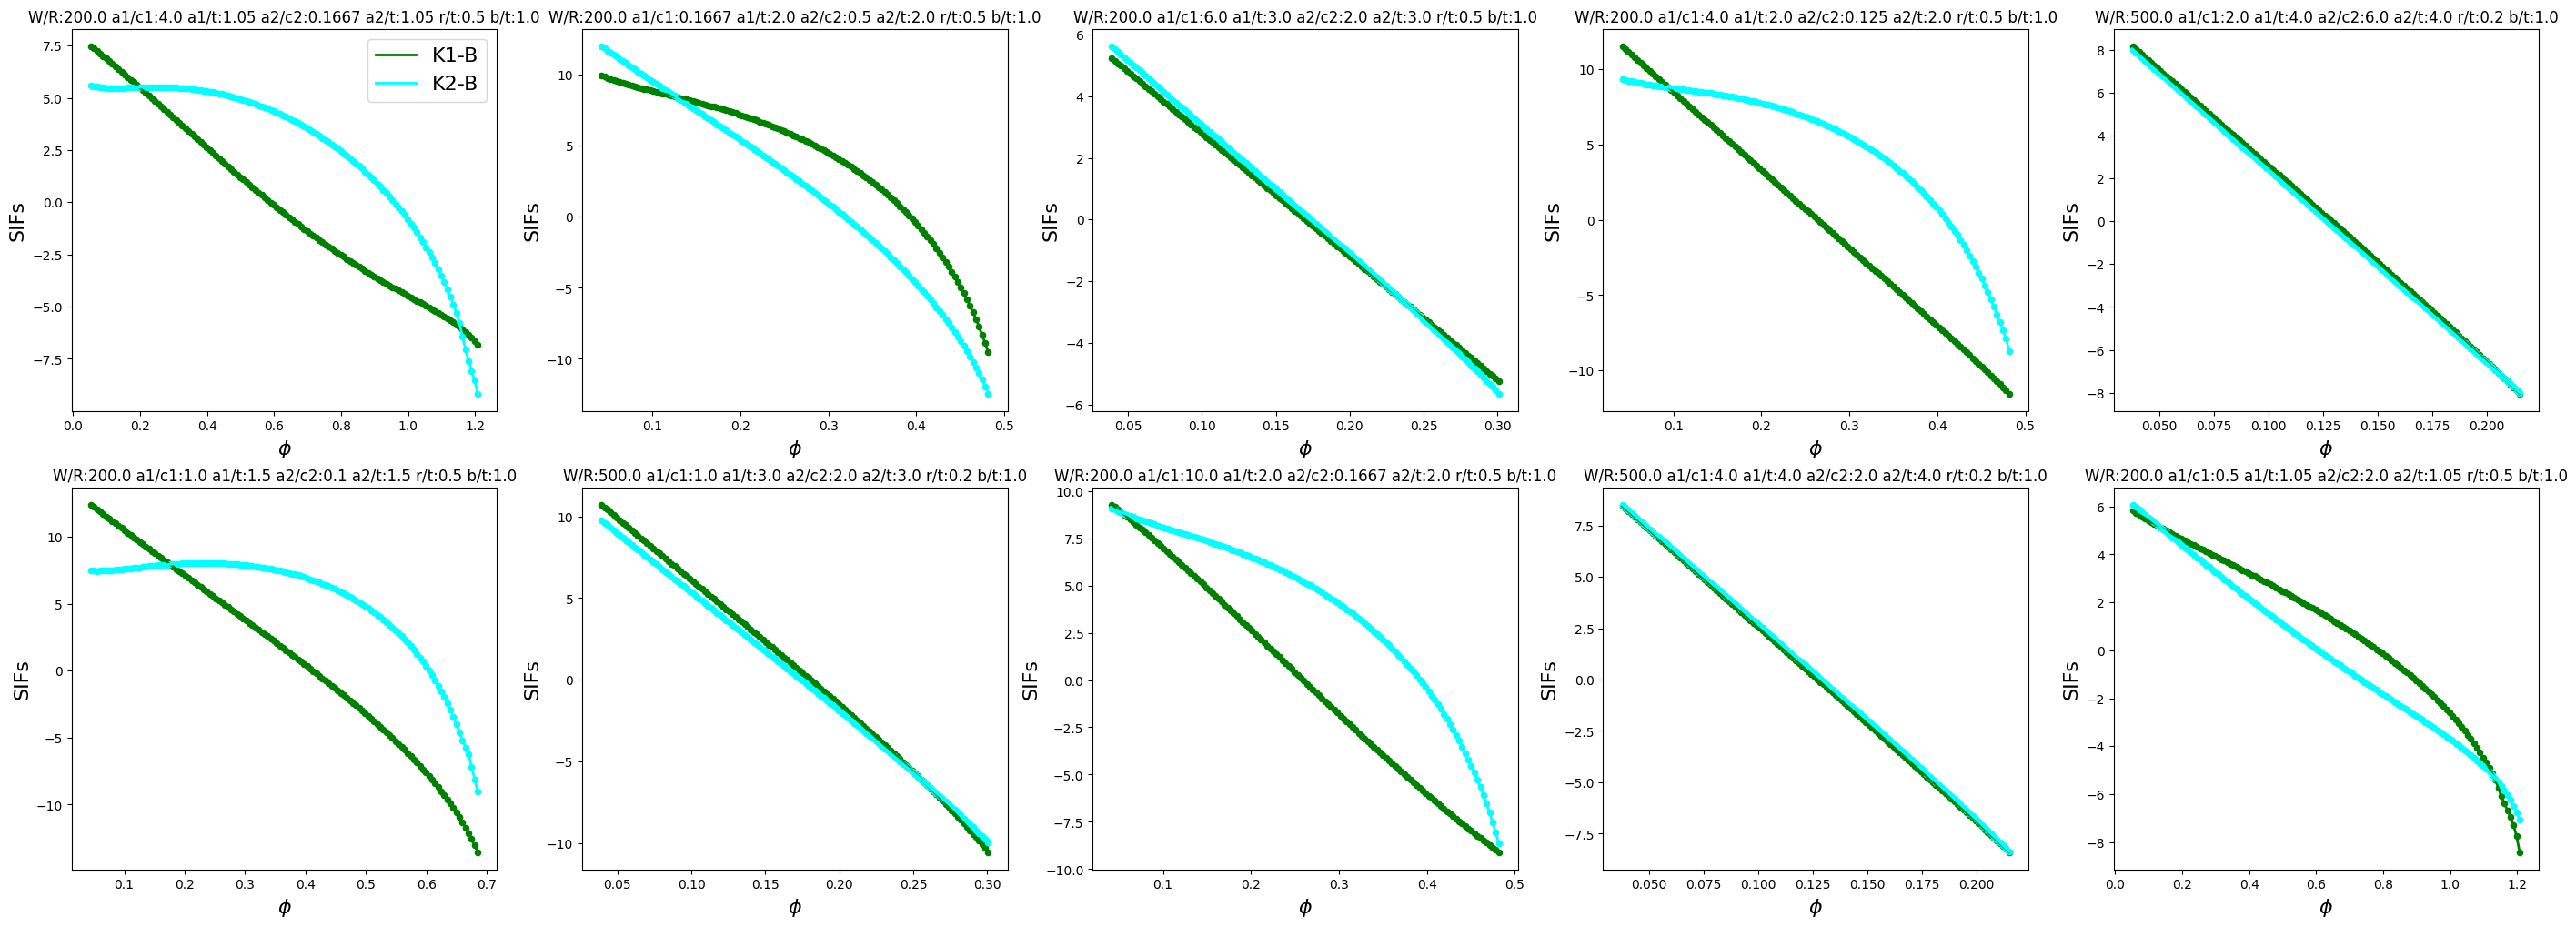

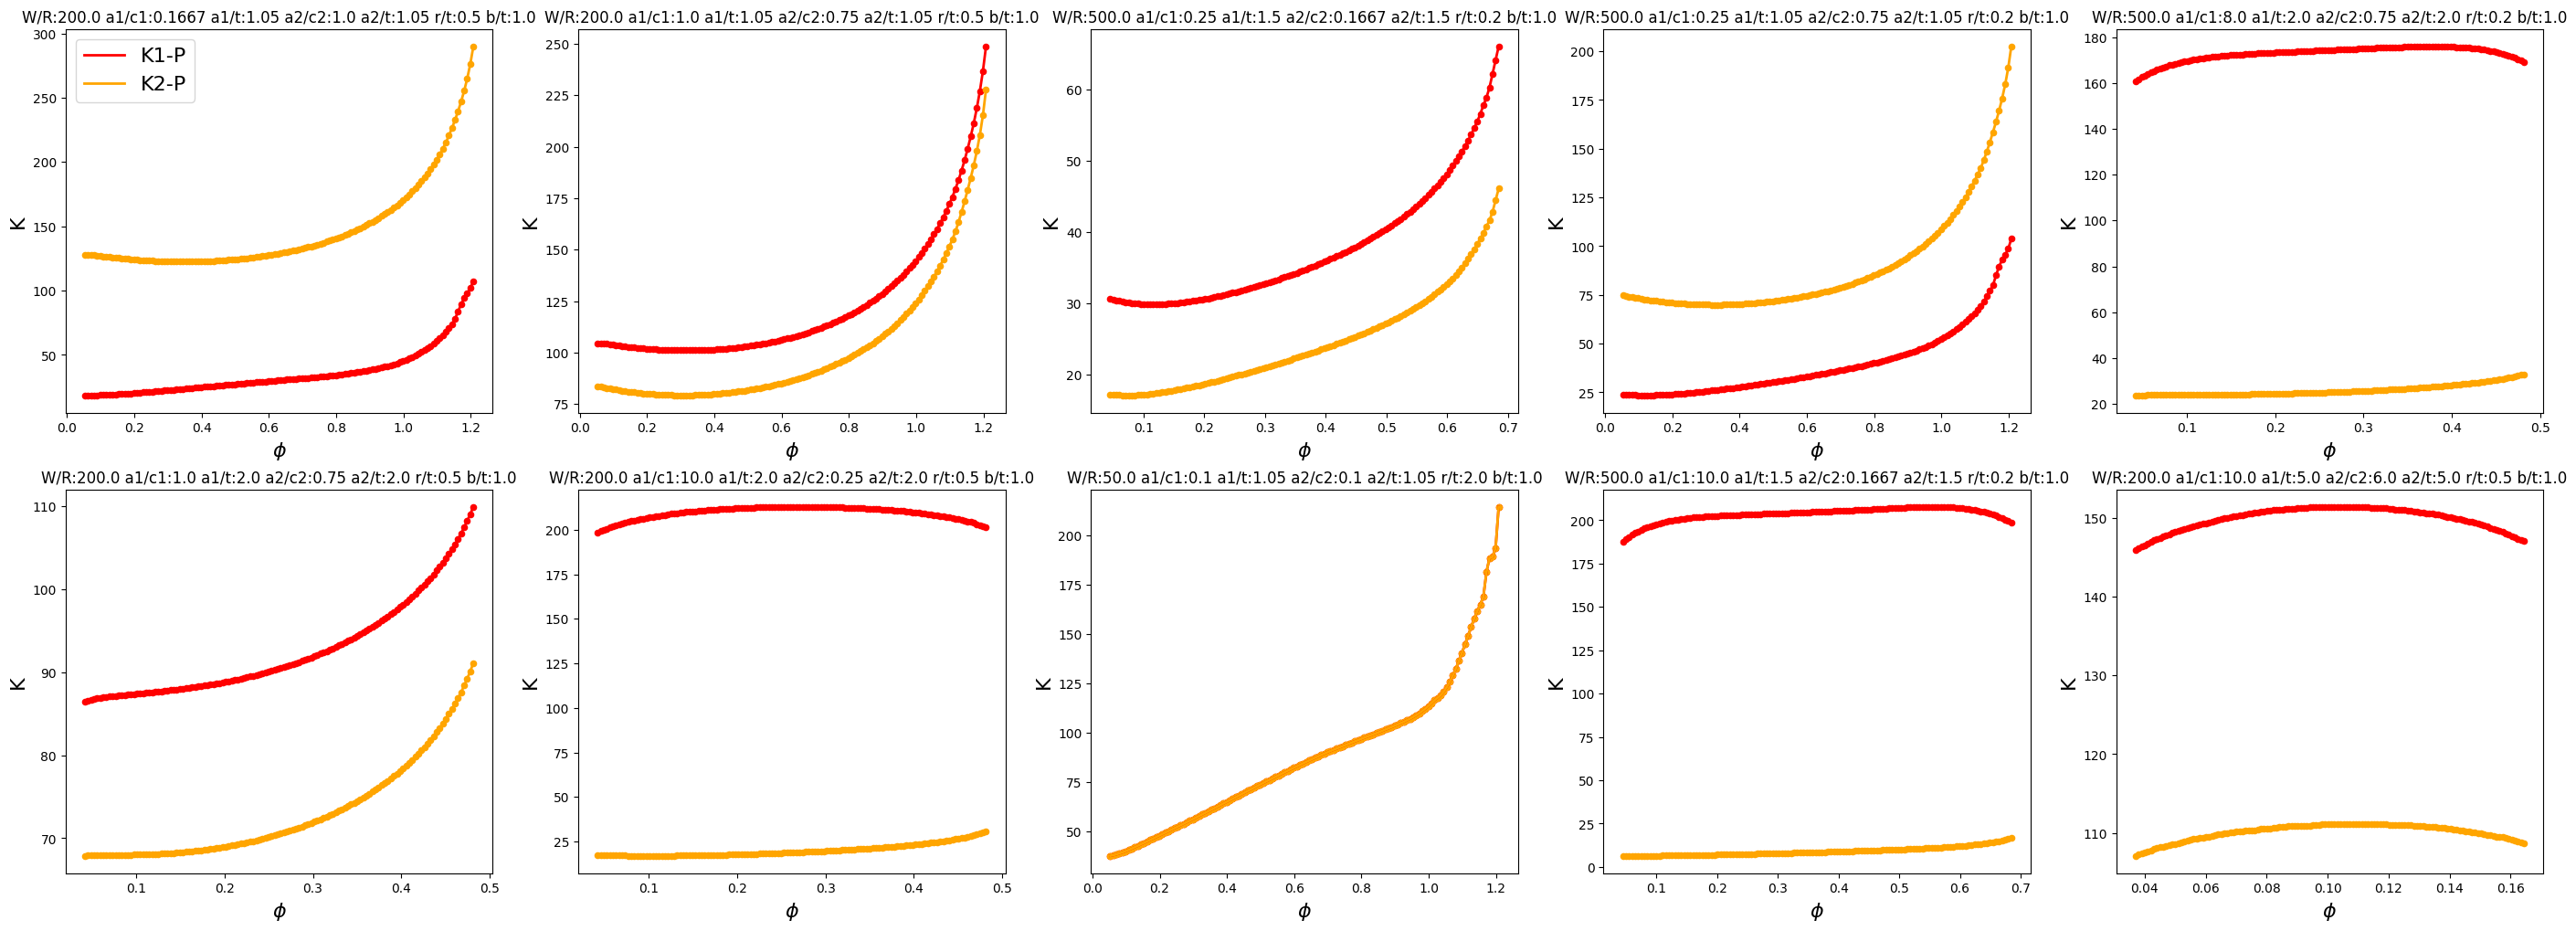

In [5]:
d = df_train.to_numpy()

num_crack = np.unique(d[:,0])

np.random.seed(100)
fig, axs = plt.subplots(2, 5, figsize=(35,12))
for i in range(2):
    for j in range(5):
        idx = np.random.randint(0, len(num_crack))
        data = d[idx*128:idx*128+128]
        W_R = np.unique(data[:,1])
        a1_c1 = np.unique(data[:,2])
        a1_t = np.unique(data[:,3])
        a2_c2 = np.unique(data[:,4])
        a2_t = np.unique(data[:,5])
        r_t = np.unique(data[:,6])
        b_t = np.unique(data[:,7])

        assert len(W_R) == 1
        assert len(a1_c1) == 1
        assert len(a1_t) == 1
        assert len(a2_c2) == 1
        assert len(a2_t) == 1
        assert len(r_t) == 1
        assert len(b_t) == 1

        axs[i,j].plot(data[:,-8], data[:,-6], label="K1-T", color='purple', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-8], data[:,-6], color='purple', s=20)

        axs[i,j].plot(data[:,-7], data[:,-5], label="K2-T", color='blue', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-7], data[:,-5], color='blue', s=20)

        axs[i,j].set_title("W/R:{} a1/c1:{} a1/t:{} a2/c2:{} a2/t:{} r/t:{} b/t:{}".format(W_R[0], a1_c1[0], a1_t[0], a2_c2[0], a2_t[0], r_t[0], b_t[0]))
        axs[i,j].set_ylabel("SIFs", fontsize=16)
        axs[i,j].set_xlabel(r"$\phi$", fontsize=16)
        
        if i == 0 and j == 0:
            axs[i,j].legend(fontsize=16)

plt.show()


fig, axs = plt.subplots(2, 5, figsize=(35,12))
for i in range(2):
    for j in range(5):
        idx = np.random.randint(0, len(num_crack))
        data = d[idx*128:idx*128+128]
        W_R = np.unique(data[:,1])
        a1_c1 = np.unique(data[:,2])
        a1_t = np.unique(data[:,3])
        a2_c2 = np.unique(data[:,4])
        a2_t = np.unique(data[:,5])
        r_t = np.unique(data[:,6])
        b_t = np.unique(data[:,7])

        assert len(W_R) == 1
        assert len(a1_c1) == 1
        assert len(a1_t) == 1
        assert len(a2_c2) == 1
        assert len(a2_t) == 1
        assert len(r_t) == 1
        assert len(b_t) == 1

        axs[i,j].plot(data[:,-8], data[:,-4], label="K1-B", color='green', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-8], data[:,-4], color='green', s=20)

        axs[i,j].plot(data[:,-7], data[:,-3], label="K2-B", color='cyan', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-7], data[:,-3], color='cyan', s=20)

        axs[i,j].set_title("W/R:{} a1/c1:{} a1/t:{} a2/c2:{} a2/t:{} r/t:{} b/t:{}".format(W_R[0], a1_c1[0], a1_t[0], a2_c2[0], a2_t[0], r_t[0], b_t[0]))
        axs[i,j].set_ylabel("SIFs", fontsize=16)
        axs[i,j].set_xlabel(r"$\phi$", fontsize=16)
        
        if i == 0 and j == 0:
            axs[i,j].legend(fontsize=16)

plt.show()

fig, axs = plt.subplots(2, 5, figsize=(35,12))
for i in range(2):
    for j in range(5):
        idx = np.random.randint(0, len(num_crack))
        data = d[idx*128:idx*128+128]
        W_R = np.unique(data[:,1])
        a1_c1 = np.unique(data[:,2])
        a1_t = np.unique(data[:,3])
        a2_c2 = np.unique(data[:,4])
        a2_t = np.unique(data[:,5])
        r_t = np.unique(data[:,6])
        b_t = np.unique(data[:,7])

        assert len(W_R) == 1
        assert len(a1_c1) == 1
        assert len(a1_t) == 1
        assert len(a2_c2) == 1
        assert len(a2_t) == 1
        assert len(r_t) == 1
        assert len(b_t) == 1

        axs[i,j].plot(data[:,-8], data[:,-2], label="K1-P", color='red', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-8], data[:,-2], color='red', s=20)

        axs[i,j].plot(data[:,-7], data[:,-1], label="K2-P", color='orange', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-7], data[:,-1], color='orange', s=20)

        axs[i,j].set_title("W/R:{} a1/c1:{} a1/t:{} a2/c2:{} a2/t:{} r/t:{} b/t:{}".format(W_R[0], a1_c1[0], a1_t[0], a2_c2[0], a2_t[0], r_t[0], b_t[0]))
        axs[i,j].set_ylabel("K", fontsize=16)
        axs[i,j].set_xlabel(r"$\phi$", fontsize=16)
        
        if i == 0 and j == 0:
            axs[i,j].legend(fontsize=16)

plt.show()

# Testing Data

In [6]:
df_test = pd.read_csv("../files/data/TWIN/CORNER_CRACK_STRAIGHT_HOLE/TWIN_CORNER_CRACK_BH_THROUGH_THICKNESS_TEST.csv")
df_test

,c_index,W/R,a1/c1,a1/t,a2/c2,a2/t,r/t,b/t,phi_1,phi_2,K1-T,K2-T,K1-B,K2-B,K1-P,K2-P
0,23433.0,500.0,0.1,1.05,1.0,1.05,0.2,1.0,0.053182,0.053182,12.609315,29.095065,8.231219,15.415276,3.801057,92.242902
1,23433.0,500.0,0.1,1.05,1.0,1.05,0.2,1.0,0.062274,0.062274,12.726833,28.959063,8.269789,15.184936,3.831020,92.156367
2,23433.0,500.0,0.1,1.05,1.0,1.05,0.2,1.0,0.071365,0.071365,12.882903,28.817861,8.328115,14.958688,3.871783,92.036055
3,23433.0,500.0,0.1,1.05,1.0,1.05,0.2,1.0,0.080456,0.080456,13.054613,28.676069,8.397223,14.727620,3.920330,91.894722
4,23433.0,500.0,0.1,1.05,1.0,1.05,0.2,1.0,0.089547,0.089547,13.246789,28.533327,8.475803,14.493771,3.974565,91.742548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100859,37246.0,100.0,10.0,4.00,10.0,4.00,1.0,1.0,0.209313,0.209313,7.325824,7.325824,-3.001251,-3.001251,155.910588,155.910588
100860,37246.0,100.0,10.0,4.00,10.0,4.00,1.0,1.0,0.210707,0.210707,7.321730,7.321730,-3.050656,-3.050656,155.787848,155.787848
100861,37246.0,100.0,10.0,4.00,10.0,4.00,1.0,1.0,0.212102,0.212102,7.317360,7.317360,-3.100219,-3.100219,155.644118,155.644118
100862,37246.0,100.0,10.0,4.00,10.0,4.00,1.0,1.0,0.213496,0.213496,7.312668,7.312668,-3.149907,-3.149907,155.475226,155.475226


In [7]:
# Get unique combinations of the first four columns
CC_combinations = df_test.iloc[:, 1:8].drop_duplicates().to_numpy()

print(len(CC_combinations))

788


In [8]:
print("Different W/r values: ", np.unique(CC_combinations[:,0], axis=0))
print("Different a1/c1 values: ", np.unique(CC_combinations[:,1], axis=0))
print("Different a1/t values: ", np.unique(CC_combinations[:,2], axis=0))
print("Different a2/c2 values: ", np.unique(CC_combinations[:,3], axis=0))
print("Different a2/t values: ", np.unique(CC_combinations[:,4], axis=0))
print("Different r/t values: ", np.unique(CC_combinations[:,5], axis=0))
print("Different b/t values: ", np.unique(CC_combinations[:,6], axis=0))

Different W/r values:  [ 33.333  50.    100.    200.    500.   ]
Different a1/c1 values:  [ 0.1     0.125   0.1667  0.25    0.5     0.75    1.      2.      4.
  6.      8.     10.    ]
Different a1/t values:  [1.05 1.5  2.   3.   4.   5.  ]
Different a2/c2 values:  [ 0.1     0.125   0.1667  0.25    0.5     0.75    1.      2.      4.
  6.      8.     10.    ]
Different a2/t values:  [1.05 1.5  2.   3.   4.   5.  ]
Different r/t values:  [0.2 0.5 1.  2.  3. ]
Different b/t values:  [1.]


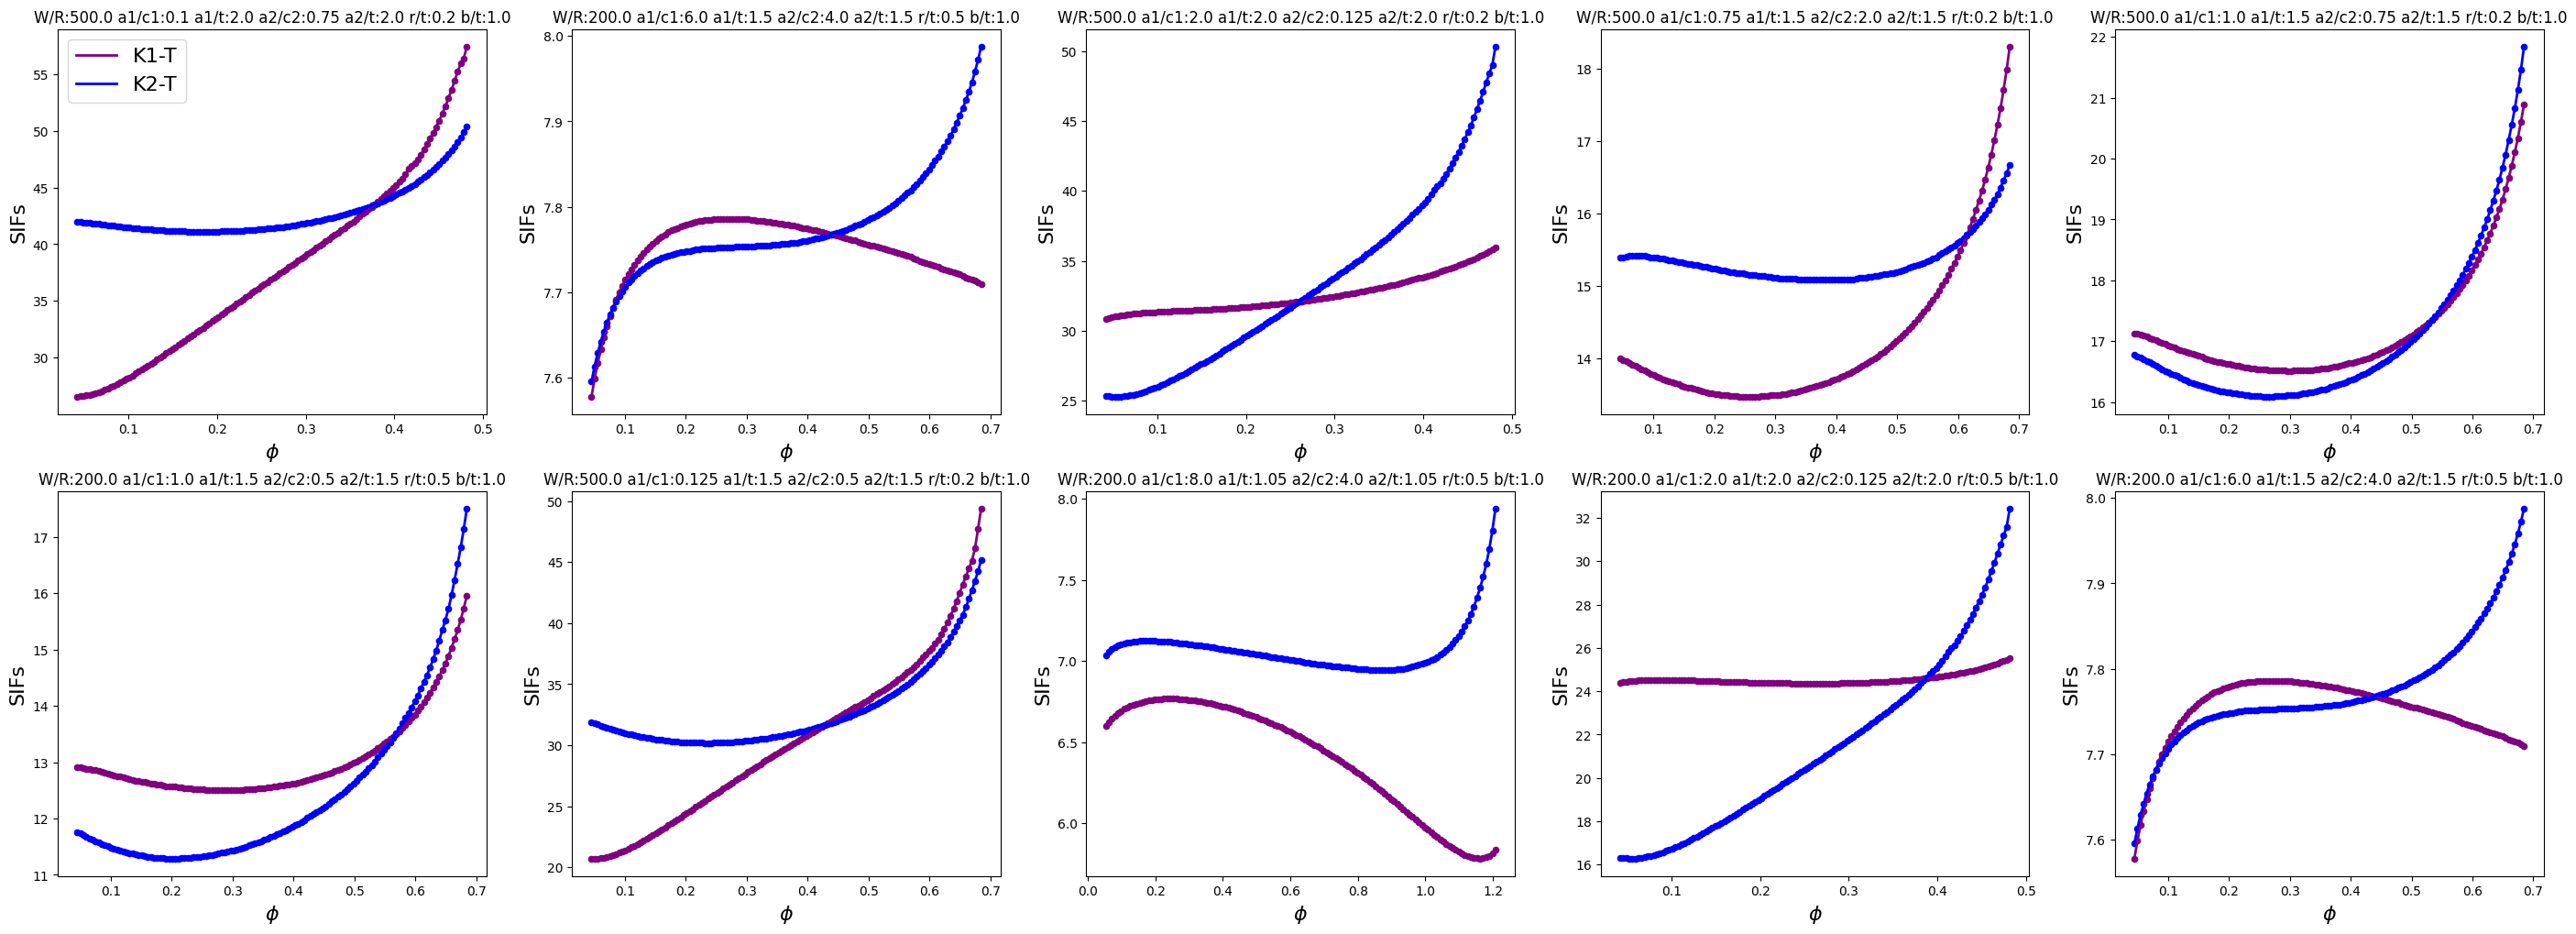

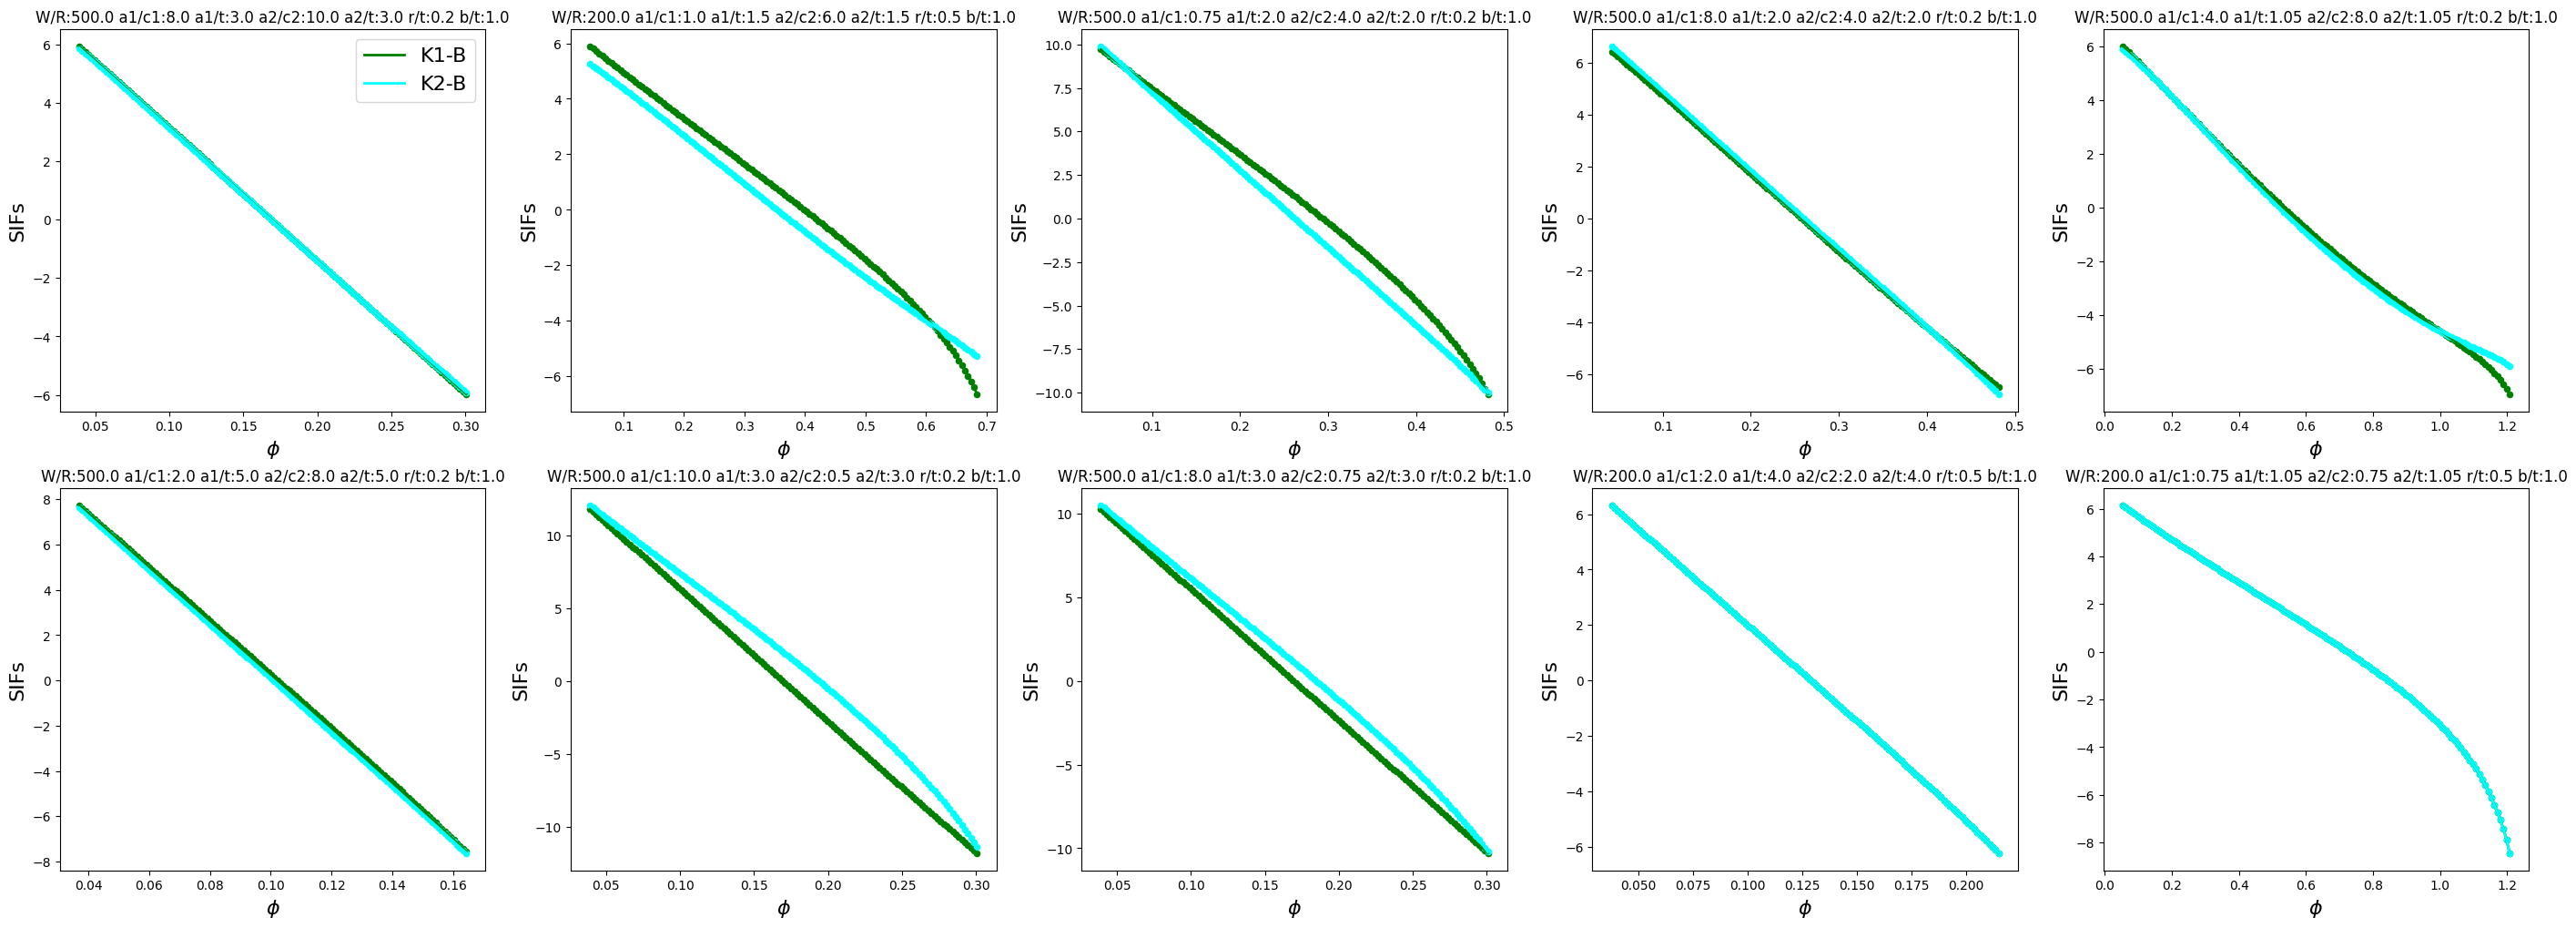

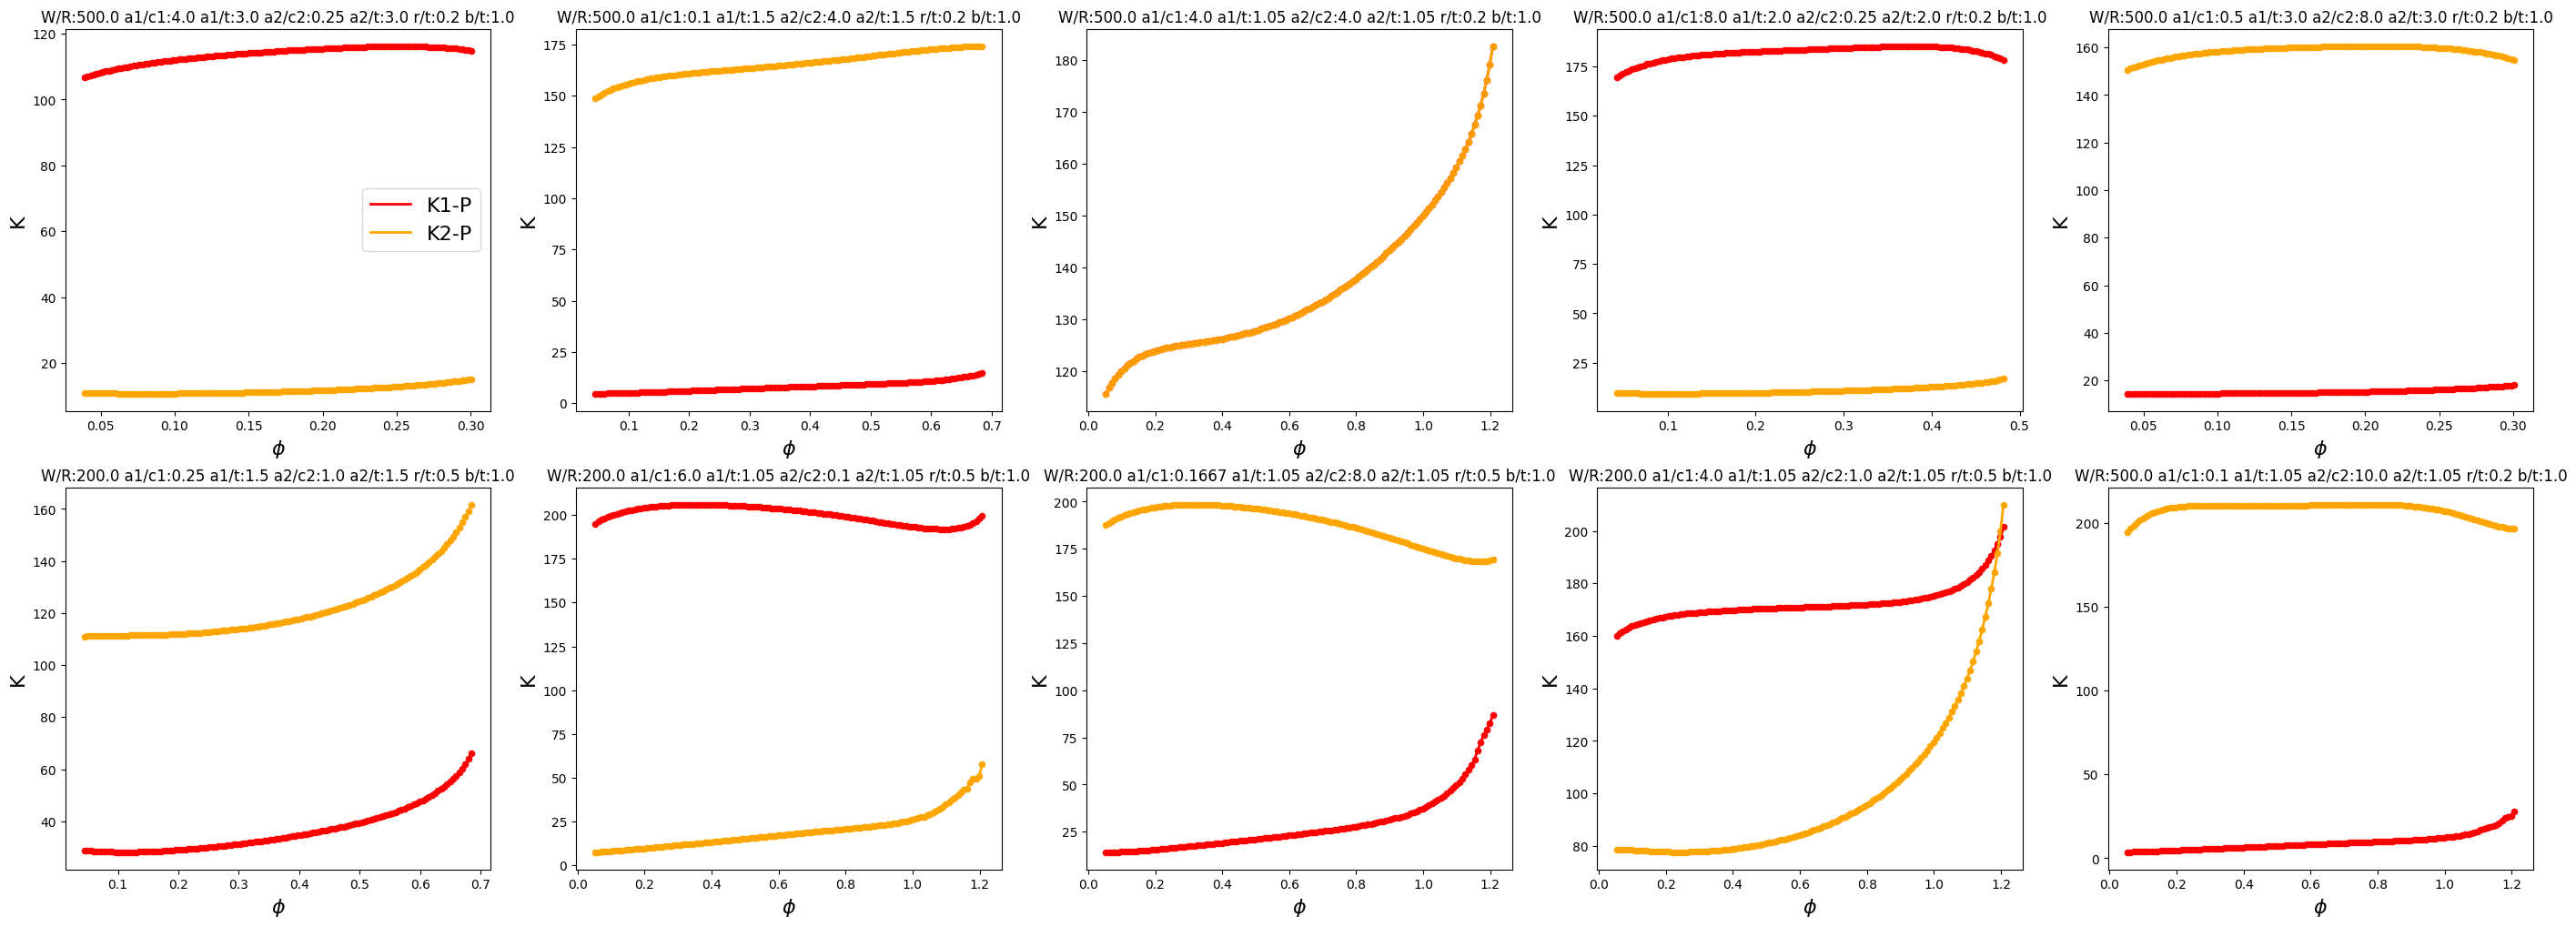

In [9]:
d = df_test.to_numpy()

num_crack = np.unique(d[:,0])

np.random.seed(100)
fig, axs = plt.subplots(2, 5, figsize=(35,12))
for i in range(2):
    for j in range(5):
        idx = np.random.randint(0, len(num_crack))
        data = d[idx*128:idx*128+128]
        W_R = np.unique(data[:,1])
        a1_c1 = np.unique(data[:,2])
        a1_t = np.unique(data[:,3])
        a2_c2 = np.unique(data[:,4])
        a2_t = np.unique(data[:,5])
        r_t = np.unique(data[:,6])
        b_t = np.unique(data[:,7])

        assert len(W_R) == 1
        assert len(a1_c1) == 1
        assert len(a1_t) == 1
        assert len(a2_c2) == 1
        assert len(a2_t) == 1
        assert len(r_t) == 1
        assert len(b_t) == 1

        axs[i,j].plot(data[:,-8], data[:,-6], label="K1-T", color='purple', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-8], data[:,-6], color='purple', s=20)

        axs[i,j].plot(data[:,-7], data[:,-5], label="K2-T", color='blue', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-7], data[:,-5], color='blue', s=20)

        axs[i,j].set_title("W/R:{} a1/c1:{} a1/t:{} a2/c2:{} a2/t:{} r/t:{} b/t:{}".format(W_R[0], a1_c1[0], a1_t[0], a2_c2[0], a2_t[0], r_t[0], b_t[0]))
        axs[i,j].set_ylabel("SIFs", fontsize=16)
        axs[i,j].set_xlabel(r"$\phi$", fontsize=16)
        
        if i == 0 and j == 0:
            axs[i,j].legend(fontsize=16)

plt.show()


fig, axs = plt.subplots(2, 5, figsize=(35,12))
for i in range(2):
    for j in range(5):
        idx = np.random.randint(0, len(num_crack))
        data = d[idx*128:idx*128+128]
        W_R = np.unique(data[:,1])
        a1_c1 = np.unique(data[:,2])
        a1_t = np.unique(data[:,3])
        a2_c2 = np.unique(data[:,4])
        a2_t = np.unique(data[:,5])
        r_t = np.unique(data[:,6])
        b_t = np.unique(data[:,7])

        assert len(W_R) == 1
        assert len(a1_c1) == 1
        assert len(a1_t) == 1
        assert len(a2_c2) == 1
        assert len(a2_t) == 1
        assert len(r_t) == 1
        assert len(b_t) == 1

        axs[i,j].plot(data[:,-8], data[:,-4], label="K1-B", color='green', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-8], data[:,-4], color='green', s=20)

        axs[i,j].plot(data[:,-7], data[:,-3], label="K2-B", color='cyan', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-7], data[:,-3], color='cyan', s=20)

        axs[i,j].set_title("W/R:{} a1/c1:{} a1/t:{} a2/c2:{} a2/t:{} r/t:{} b/t:{}".format(W_R[0], a1_c1[0], a1_t[0], a2_c2[0], a2_t[0], r_t[0], b_t[0]))
        axs[i,j].set_ylabel("SIFs", fontsize=16)
        axs[i,j].set_xlabel(r"$\phi$", fontsize=16)
        
        if i == 0 and j == 0:
            axs[i,j].legend(fontsize=16)

plt.show()

fig, axs = plt.subplots(2, 5, figsize=(35,12))
for i in range(2):
    for j in range(5):
        idx = np.random.randint(0, len(num_crack))
        data = d[idx*128:idx*128+128]
        W_R = np.unique(data[:,1])
        a1_c1 = np.unique(data[:,2])
        a1_t = np.unique(data[:,3])
        a2_c2 = np.unique(data[:,4])
        a2_t = np.unique(data[:,5])
        r_t = np.unique(data[:,6])
        b_t = np.unique(data[:,7])

        assert len(W_R) == 1
        assert len(a1_c1) == 1
        assert len(a1_t) == 1
        assert len(a2_c2) == 1
        assert len(a2_t) == 1
        assert len(r_t) == 1
        assert len(b_t) == 1

        axs[i,j].plot(data[:,-8], data[:,-2], label="K1-P", color='red', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-8], data[:,-2], color='red', s=20)

        axs[i,j].plot(data[:,-7], data[:,-1], label="K2-P", color='orange', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-7], data[:,-1], color='orange', s=20)

        axs[i,j].set_title("W/R:{} a1/c1:{} a1/t:{} a2/c2:{} a2/t:{} r/t:{} b/t:{}".format(W_R[0], a1_c1[0], a1_t[0], a2_c2[0], a2_t[0], r_t[0], b_t[0]))
        axs[i,j].set_ylabel("K", fontsize=16)
        axs[i,j].set_xlabel(r"$\phi$", fontsize=16)
        
        if i == 0 and j == 0:
            axs[i,j].legend(fontsize=16)

plt.show()